GROUP NUMBER:47

GROUP MEMBERS that participated in the production of this file: Yixiao Zhao; Junyi Ma; Xinyi Liu; Xiao Li

Comments:

# HOMEWORK 4



This problem set provides both computational and theoretical practice on forming mean-variance efficient portfolios and employing mean-variance mathematics.



### 1. 

In order to proceed you need Microsoft Excel and file "https://www.dropbox.com/s/5qituivg6ovlscr/Homework3.xlsx?dl=1". 

This file contains data for 10 value-weighted industry portfolios, using monthly returns over an 90-year period.  



Find the minimum variance and tangency portfolios of the industries. 

(hint 1:  you will need to compute the means (arithmetic average), standard deviations, variances, and covariance matrix of the industries.  The risk-free rate is given in the spreadsheet--make sure NOT to include it in the analysis. ) 

(hint 2::  to find the minimum variance portfolio, use returns and not excess returns, switch the expected return constraint W'E[R]=mu to W'1=1, that is the weigths have to add up to one )

Comment on the different weights applied to each industry under the MVP and Tangent portfolios


### Answer here:

In [238]:
import pandas as pd
import numpy as np
from scipy import stats as stats

#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [239]:
data_url="https://www.dropbox.com/s/5qituivg6ovlscr/Homework3.xlsx?dl=1"
df = pd.read_excel(data_url, index_col=0, parse_dates = True, )
df = df/100
df.index 
df.index=pd.to_datetime(df.index,format = '%Y%m',errors='ignore')
df.head()

NoDur   Durbl   Manuf   Enrgy   HiTec   Telcm   Shops   Hlth   \
1926-07-01  0.0145  0.1555  0.0469 -0.0118  0.0290  0.0083  0.0011  0.0177   
1926-08-01  0.0397  0.0368  0.0281  0.0347  0.0266  0.0217 -0.0071  0.0425   
1926-09-01  0.0114  0.0480  0.0115 -0.0339 -0.0038  0.0241  0.0021  0.0069   
1926-10-01 -0.0124 -0.0823 -0.0363 -0.0078 -0.0458 -0.0011 -0.0229 -0.0057   
1926-11-01  0.0521 -0.0019  0.0410  0.0001  0.0471  0.0163  0.0643  0.0542   

             Utils   Other  Risk-free rate  
1926-07-01  0.0704  0.0216          0.0022  
1926-08-01 -0.0169  0.0438          0.0025  
1926-09-01  0.0204  0.0029          0.0023  
1926-10-01 -0.0263 -0.0285          0.0032  
1926-11-01  0.0371  0.0211          0.0031

In [240]:
df2 = df.iloc[:,0:10]
df2.head()

NoDur   Durbl   Manuf   Enrgy   HiTec   Telcm   Shops   Hlth   \
1926-07-01  0.0145  0.1555  0.0469 -0.0118  0.0290  0.0083  0.0011  0.0177   
1926-08-01  0.0397  0.0368  0.0281  0.0347  0.0266  0.0217 -0.0071  0.0425   
1926-09-01  0.0114  0.0480  0.0115 -0.0339 -0.0038  0.0241  0.0021  0.0069   
1926-10-01 -0.0124 -0.0823 -0.0363 -0.0078 -0.0458 -0.0011 -0.0229 -0.0057   
1926-11-01  0.0521 -0.0019  0.0410  0.0001  0.0471  0.0163  0.0643  0.0542   

             Utils   Other  
1926-07-01  0.0704  0.0216  
1926-08-01 -0.0169  0.0438  
1926-09-01  0.0204  0.0029  
1926-10-01 -0.0263 -0.0285  
1926-11-01  0.0371  0.0211

In [241]:
df3 = df.iloc[:,0:10]
for column in df3.columns:
    df3[column]=df2[column]-df['Risk-free rate']
df3.head()

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


NoDur   Durbl   Manuf   Enrgy   HiTec   Telcm   Shops   Hlth   \
1926-07-01  0.0123  0.1533  0.0447 -0.0140  0.0268  0.0061 -0.0011  0.0155   
1926-08-01  0.0372  0.0343  0.0256  0.0322  0.0241  0.0192 -0.0096  0.0400   
1926-09-01  0.0091  0.0457  0.0092 -0.0362 -0.0061  0.0218 -0.0002  0.0046   
1926-10-01 -0.0156 -0.0855 -0.0395 -0.0110 -0.0490 -0.0043 -0.0261 -0.0089   
1926-11-01  0.0490 -0.0050  0.0379 -0.0030  0.0440  0.0132  0.0612  0.0511   

             Utils   Other  
1926-07-01  0.0682  0.0194  
1926-08-01 -0.0194  0.0413  
1926-09-01  0.0181  0.0006  
1926-10-01 -0.0295 -0.0317  
1926-11-01  0.0340  0.0180

In [242]:
# tangency portfolios 
ER1=df3.mean()
Cov1=df3.cov()
np.linalg.inv(Cov1)
SRmax=np.sqrt(ER1.values.T @ np.linalg.inv(Cov1) @ ER1.values)
Wmve= np.linalg.inv(Cov1) @ ER1.values
TangentPortfolio=Wmve/Wmve.sum()
print(TangentPortfolio)

[ 0.82742309  0.0913663  -0.19956638  0.31575394  0.01871339  0.34113147
 -0.04383604  0.32198931 -0.03258938 -0.6403857 ]


In [243]:
# Tangent portfolios
# NoDur: 0.82742309, Durbl: 0.0913663 , Manuf: -0.19956638, Enrgy: 0.31575394, HiTec: 0.01871339,
# Telcm: 0.34113147, Shops: -0.04383604, Hlth: 0.32198931, Utils: -0.03258938, Other: -0.6403857

In [244]:
from scipy.optimize import minimize

In [245]:
# MVP
ER=df2.mean()
Cov=df2.cov()
# the function to be minimized
def func(W):
    return W.T @ Cov @ W
# the cosntraints
cons=(
        {'type': 'eq',
          'fun' : lambda W: W.sum()-1})
# the initial guess for the weights (what you are maximizing over)
W0=np.ones(df2.shape[1])/df2.shape[1] # use equal weighted as a guess
res = minimize(func,W0, constraints=cons, options={'disp': True})
MinimumVarPortfolio=res.x
print(MinimumVarPortfolio)
res

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0015842167797952868
            Iterations: 6
            Function evaluations: 72
            Gradient evaluations: 6
[ 0.31465008 -0.22849671 -0.06658995  0.21372769 -0.16401894  0.43454794
  0.08243358  0.21943814  0.26425962 -0.06995145]


     fun: 0.0015842167797952868
     jac: array([ 0.00289511,  0.00280556,  0.0031971 ,  0.00325446,  0.0031414 ,
        0.00286722,  0.00312549,  0.00333703,  0.00355918,  0.00350649])
 message: 'Optimization terminated successfully.'
    nfev: 72
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([ 0.31465008, -0.22849671, -0.06658995,  0.21372769, -0.16401894,
        0.43454794,  0.08243358,  0.21943814,  0.26425962, -0.06995145])

In [246]:
# MVP
# NoDur: 0.31465008 , Durbl: -0.22849671, Manuf: -0.06658995, Enrgy: 0.21372769, HiTec:  -0.16401894,
# Telcm: 0.43454794, Shops: 0.08243358, Hlth: 0.21943814, Utils: 0.26425962, Other: -0.06995145

### 2. 

Compute the means and standard deviations of the MVP and Tangent portfolios.  Plot the efficient frontier of these 10 industries and plot the 10 industries as well on a mean-standard deviation diagram.  

Why does the efficient frontier exhibit the shape that it does (i.e., why is it a parabola)?


### Answer here:

In [247]:
TangentW=TangentPortfolio
TangentW

array([ 0.82742309,  0.0913663 , -0.19956638,  0.31575394,  0.01871339,
        0.34113147, -0.04383604,  0.32198931, -0.03258938, -0.6403857 ])

In [248]:
MVPW=MinimumVarPortfolio
MVPW

array([ 0.31465008, -0.22849671, -0.06658995,  0.21372769, -0.16401894,
        0.43454794,  0.08243358,  0.21943814,  0.26425962, -0.06995145])

In [249]:
# tangency portfolio mean
TMean=ER1 @ TangentW
TMean

0.0076972099869200327

In [250]:
# tangency portfolio std
TStd = np.sqrt(TangentW.T @ Cov1 @ TangentW)
TStd

0.040503128255486076

In [251]:
# MVP mean
MVPMean=ER @ MVPW
MVPMean

0.0062268464372755034

In [252]:
# MVP std
MVPStd = np.sqrt(res.fun)
MVPStd

0.039802220789740952

In [253]:
ER=df2.mean()
Cov=df2.cov()
minstd=[]
mutargets=np.linspace(0,0.03,40)
def func(W):
    return W.T @ Cov @ W
W0=np.ones(df2.shape[1])/df2.shape[1]
for mu0 in mutargets:
    cons2=({'type': 'eq',
          'fun' : lambda W : W.T @ ER.values-mu0},
        {'type': 'eq',
          'fun' : lambda W: W.sum()-1})
    res2 = minimize(func,W0,constraints=cons2, options={'disp': False})
    #plt.scatter(res2.fun,mu0)
    minstd.append([res2.fun**0.5,res2.x @ ER.values])

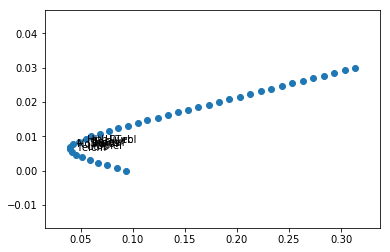

In [254]:
A=np.array(minstd)
plt.scatter(A[:,0],A[:,1])
for label in df2.columns :
   plt.text(df2.std()[label],df2.mean()[label],label)

In [255]:
# Why does the efficient frontier exhibit the shape that it does (i.e., why is it a parabola)?
# As the ER goes up, the std goes up.

### 3. 

Comment on the reliability of the mean return estimates for each industry.  
Then, artificially change the mean return estimates of each industry by a one standard error increase.  How much does the Tangent portfolio change?  Does the efficient frontier change a lot or a little?
 
 ### Answer here:

In [259]:
ER=df2.mean()
obs=df2.shape[0]
StdError=df2.std()/np.sqrt(obs)
StdError

NoDur    0.001415
Durbl    0.002375
Manuf    0.001929
Enrgy    0.001865
HiTec    0.002239
Telcm    0.001409
Shops    0.001798
Hlth     0.001714
Utils    0.001704
Other    0.001981
dtype: float64

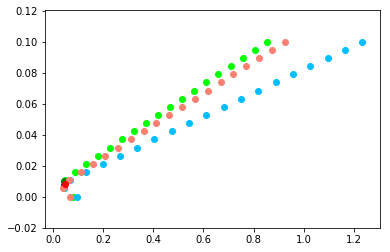

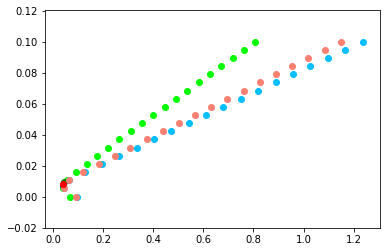

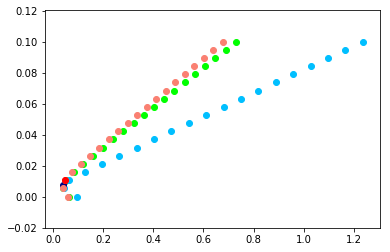

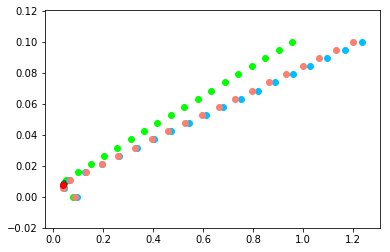

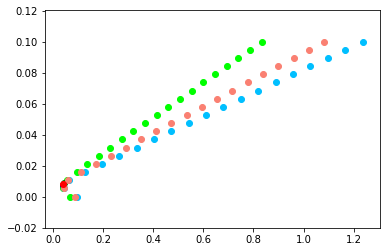

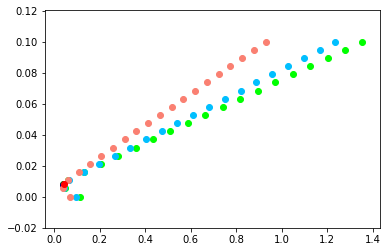

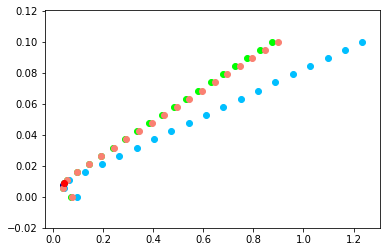

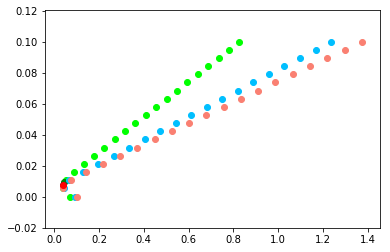

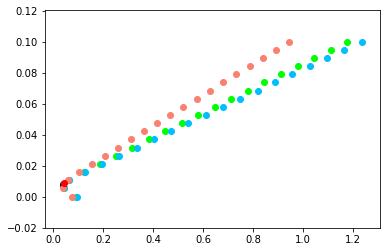

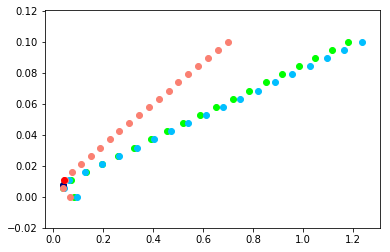

In [270]:
# Efficient Frontier and tangency portfolio
for i in range(10):
    ER=df2.mean()
    ER[i]= ER[i]+StdError[i]
    Cov=df2.cov()
    minstd3=[]
    mutargets3=np.linspace(0,0.1,20)
    def func3(W):
        return W.T @ Cov @ W
    W03=np.ones(df2.shape[1])/df2.shape[1]
    for mu03 in mutargets3:
        cons3=({'type': 'eq',
          'fun' : lambda W : W.T @ ER.values-mu03},
        {'type': 'eq',
          'fun' : lambda W: W.sum()-1})
        res3 = minimize(func3,W03,constraints=cons3, options={'disp': False})
        minstd3.append([res3.fun**0.5,res3.x @ ER.values])
    Q3=np.array(minstd3)
    plt.scatter(Q3[:,0],Q3[:,1],c='lime')
    np.linalg.inv(Cov)
    SRmax=np.sqrt(ER.values.T @ np.linalg.inv(Cov) @ ER.values)
    Wmve= np.linalg.inv(Cov) @ ER.values
    TangentPortfolio=Wmve/Wmve.sum()
    TangentW=TangentPortfolio
    TStd = np.sqrt(TangentW.T @ Cov @ TangentW)
    TMean=ER @ TangentW
    plt.scatter(TStd,TMean,c='green')
    
    ER=df2.mean()
    ER[i]= ER[i]
    Cov=df2.cov()
    minstd3=[]
    mutargets3=np.linspace(0,0.1,20)
    def func3(W):
        return W.T @ Cov @ W
    W03=np.ones(df2.shape[1])/df2.shape[1]
    for mu03 in mutargets3:
        cons3=({'type': 'eq',
          'fun' : lambda W : W.T @ ER.values-mu03},
        {'type': 'eq',
          'fun' : lambda W: W.sum()-1})
        res3 = minimize(func3,W03,constraints=cons3, options={'disp': False})
        minstd3.append([res3.fun**0.5,res3.x @ ER.values])
    Q3=np.array(minstd3)
    plt.scatter(Q3[:,0],Q3[:,1],c='deepskyblue')
    np.linalg.inv(Cov)
    SRmax=np.sqrt(ER.values.T @ np.linalg.inv(Cov) @ ER.values)
    Wmve= np.linalg.inv(Cov) @ ER.values
    TangentPortfolio=Wmve/Wmve.sum()
    TangentW=TangentPortfolio
    TStd = np.sqrt(TangentW.T @ Cov @ TangentW)
    TMean=ER @ TangentW
    plt.scatter(TStd,TMean,c='navy')
    
    ER=df2.mean()
    ER[i]= ER[i]-StdError[i]
    Cov=df2.cov()
    minstd3=[]
    mutargets3=np.linspace(0,0.1,20)
    def func3(W):
        return W.T @ Cov @ W
    W03=np.ones(df2.shape[1])/df2.shape[1]
    for mu03 in mutargets3:
        cons3=({'type': 'eq',
          'fun' : lambda W : W.T @ ER.values-mu03},
        {'type': 'eq',
          'fun' : lambda W: W.sum()-1})
        res3 = minimize(func3,W03,constraints=cons3, options={'disp': False})
        minstd3.append([res3.fun**0.5,res3.x @ ER.values])
    Q3=np.array(minstd3)
    plt.scatter(Q3[:,0],Q3[:,1],c='salmon')
    np.linalg.inv(Cov)
    SRmax=np.sqrt(ER.values.T @ np.linalg.inv(Cov) @ ER.values)
    Wmve= np.linalg.inv(Cov) @ ER.values
    TangentPortfolio=Wmve/Wmve.sum()
    TangentW=TangentPortfolio
    TStd = np.sqrt(TangentW.T @ Cov @ TangentW)
    TMean=ER @ TangentW
    plt.scatter(TStd,TMean,c='red')
    
    plt.show()

In [ ]:
# As you can see the plot above.
# Lime plot stands for "+1 standard error", green dot stands for tangency prorfolio for "+1 standard error"
# deepskyblue plot stands for "original data", navy dot stands for tangency prorfolio for "original data"
# Salmon(light red) plot stands for "-1 standard error", red dot stands for tangency prorfolio for "-1 standard error"

In [54]:
# Tangent Portfolio does not changed a lot, since the green and red dots seems to overlap the original tangency portfolio

In [272]:
# The change of efficient frontier varies a lot depends on chanding different stdError of different stocks.
# But basically speakking they do change a lot.

### 4. 

Comment on the reliability of the covariance matrix estimate.  

First,lets ignore covaraince terms:  assume that all covariances are zero and recompute the efficient frontier using the diagonal matrix of variances as the covariance matrix.

Then, lets also ignore variance terms: assume very simply that the covariance matrix is just the identity matrix (i.e., a matrix of ones along the diagonal and zeros everywhere else).  

Does the mean-variance frontier change a lot or a little, relative to the analysis in 3)?  

How important are the covariance terms relative to the variance terms?

 ### Answer here:

In [63]:
ER=df2.mean()
Cov=df2.cov()

In [64]:
Cov4=np.diagonal(Cov)
Cov4 = np.diag(Cov4)
Cov4

array([[ 0.0021395 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.00599995,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.00396179,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.00370864,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.00533816,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00212325,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.00344466,  0.        

In [78]:
# Effecient frontier ignore covaraince 
minstd4=[]
mutargets4=np.linspace(0,0.1,200)
def func4(W):
    return W.T @ Cov4 @ W
W04=np.ones(df2.shape[1])/df2.shape[1]
for mu04 in mutargets4:
    cons4=({'type': 'eq',
          'fun' : lambda W : W.T @ ER.values-mu04},
        {'type': 'eq',
          'fun' : lambda W: W.sum()-1})
    res4 = minimize(func4,W04,constraints=cons4, options={'disp': False})
    minstd4.append([res4.fun**0.5,res4.x @ ER.values])

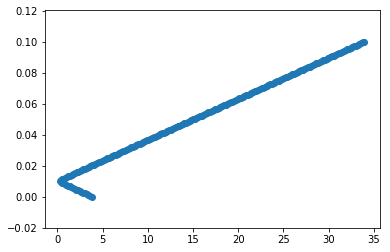

In [79]:
Q4=np.array(minstd4)
plt.scatter(Q4[:,0],Q4[:,1])

In [80]:
# Effecient frontier ignore varaince 

In [81]:
Cov4=np.identity(10)
Cov4

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [83]:
minstd4=[]
mutargets4=np.linspace(0,0.1,200)
def func4(W):
    return W.T @ Cov4 @ W
W04=np.ones(df2.shape[1])/df2.shape[1]
for mu04 in mutargets4:
    cons4=({'type': 'eq',
          'fun' : lambda W : W.T @ ER.values-mu04},
        {'type': 'eq',
          'fun' : lambda W: W.sum()-1})
    res4 = minimize(func4,W04,constraints=cons4, options={'disp': False})
    minstd4.append([res4.fun**0.5,res4.x @ ER.values])

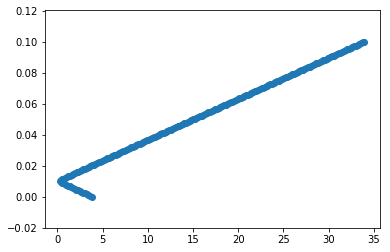

In [84]:
Q4=np.array(minstd4)
plt.scatter(Q4[:,0],Q4[:,1])

In [74]:
#  mean-variance frontier do not change a lot 

In [ ]:
# How important are the covariance terms relative to the variance terms?
# Since it do not change a lot, it seem to be unimportant